Experimenting to see if we get a better COS reduction.

In [9]:
#first get the python modules we need
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.convolution import convolve, Box1DKernel
from astropy.table import Table
import astropy.units as u

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/home/david/work/muscles/trappist-1/hst/data/'

In [6]:
x1ds = glob.glob(path+'*x1d.fits')
g130m = []
g160m = []
for x in x1ds:
    if fits.getheader(x)['OPT_ELEM'] == 'G130M':
        g130m.append(x)
    elif fits.getheader(x)['OPT_ELEM'] == 'G160M':
        g160m.append(x)
print(g130m)
print(g160m)
    
        
        

['/home/david/work/muscles/trappist-1/hst/data/ldlm40d2q_x1d.fits', '/home/david/work/muscles/trappist-1/hst/data/ldlm40blq_x1d.fits', '/home/david/work/muscles/trappist-1/hst/data/ldlm40axq_x1d.fits', '/home/david/work/muscles/trappist-1/hst/data/ldlm40c2q_x1d.fits', '/home/david/work/muscles/trappist-1/hst/data/ldlm40alq_x1d.fits']
['/home/david/work/muscles/trappist-1/hst/data/ldlm39itq_x1d.fits', '/home/david/work/muscles/trappist-1/hst/data/ldlm39ikq_x1d.fits', '/home/david/work/muscles/trappist-1/hst/data/ldlm39i5q_x1d.fits', '/home/david/work/muscles/trappist-1/hst/data/ldlm39ibq_x1d.fits']


Have a look at one:

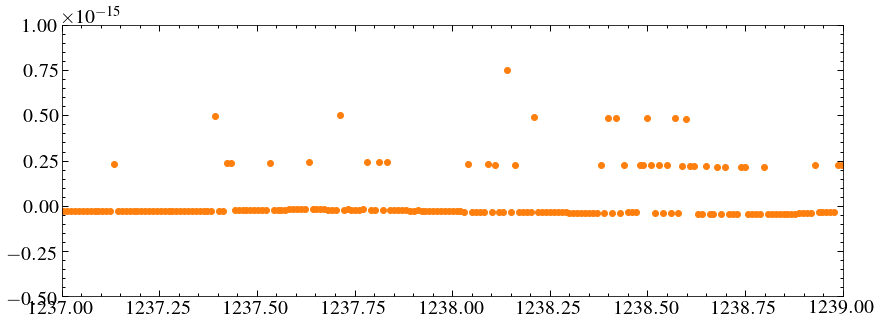

In [45]:
for x in g130m[0:1]:
    data = fits.getdata(x,1)
    for dt in data:
        f = dt['FLUX']
        #f = convolve(f,Box1DKernel(5))
        #plt.step(dt['WAVELENGTH'], f, where='mid')
        plt.scatter(dt['WAVELENGTH'], f)
        #plt.xlim(1300, 1310) #airglow
        plt.xlim(1237, 1239) #nv
        plt.ylim(-0.5e-15, 1e-15)
        

What if we tweak the background width?

In [25]:
import costools

The following tasks in the costools package can be run with TEAL:
         splittag                 timefilter                 x1dcorr


In [31]:
a_tags = glob.glob(path+'worktags/*corrtag_a.fits')
#a_tags

In [30]:
#costools.x1dcorr.help()

In [34]:
fits.getheader(a_tags[0])

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    2 / Number of standard extensions                  
DATE    = '2018-12-10'         / date this file was written (yyyy-mm-dd)        
FILENAME= 'ldlm40c2q_corrtag_a.fits' / name of file                             
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'COS   '             / identifier for instrument used to acquire data 
EQUINOX =               2000.0 / equinox of celestial coord. system             
                            

In [40]:
bkhdu = fits.open(path+'new_bk_1dx.fits')

In [41]:
bkhdu.info()

Filename: /home/david/work/muscles/trappist-1/hst/data/new_bk_1dx.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     186   ()      
  1                1 BinTableHDU     36   112R x 13C   [4A, 5A, K, 3A, D, D, D, D, K, K, K, K, 8A]   


In [43]:
bkhdu[1].data.names

['SEGMENT',
 'OPT_ELEM',
 'CENWAVE',
 'APERTURE',
 'SLOPE',
 'B_SPEC',
 'B_BKG1',
 'B_BKG2',
 'HEIGHT',
 'B_HGT1',
 'B_HGT2',
 'BWIDTH',
 'PEDIGREE']

In [44]:
bkhdu[1].data['BWIDTH']

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100])

That's wide already, changing that probably isn't going to help anything.